# Distribution Plot
Visualize the distribution of "Purchase Amount (USD)" using a histogram and a kernel density estimate (KDE).

# Category-Wise Box Plot
Create a box plot to show the distribution of "Purchase Amount (USD)" for different "Category" values.

# Count Plot
Plot the count of purchases based on the "Gender" of the customers.

# Age vs. Purchase Amount
Use a scatter plot to explore the relationship between "Age" and "Purchase Amount (USD)". Add a regression line to this plot.

# Review Ratings by Season
Use a violin plot to show the distribution of "Review Rating" for purchases across different "Season" values.

# Category-Wise Purchase Trends by Gender
Create a grouped bar plot to compare the count of purchases for each "Category" split by "Gender".

# Payment Method Preferences
Create a pie chart or count plot to visualize the most preferred "Payment Method".

# Heatmap for Correlation
Generate a heatmap to display the correlation between numerical columns, such as "Age", "Purchase Amount (USD)", and "Previous Purchases".

# Location-Wise Average Purchase Amount
Use a bar plot to display the average "Purchase Amount (USD)" for customers from different "Location" values.

# Effect of Discounts on Review Ratings
Create a strip plot to compare "Review Rating" between purchases where a discount was applied versus those where it wasn’t.



In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Data = pd.read_csv("shopping_trends.csv")

In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [4]:
Data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# Distribution Plot

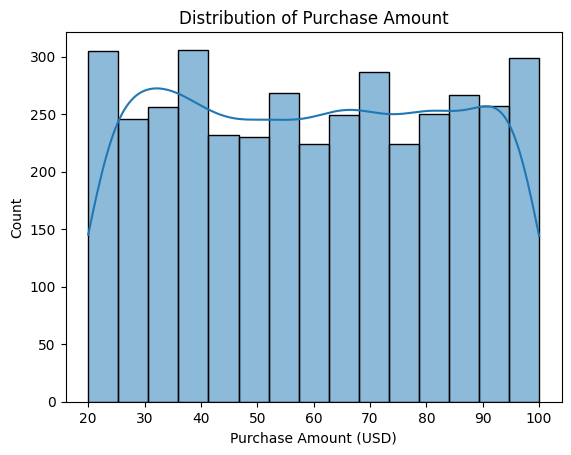

In [23]:
sns.histplot(data=Data["Purchase Amount (USD)"] , kde=True)

plt.title("Distribution of Purchase Amount")
plt.show()

# Category Wise Box Plot

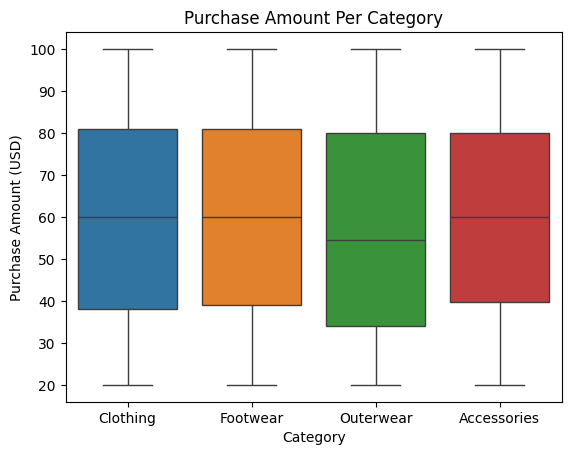

In [28]:
sns.boxplot(x="Category" , y="Purchase Amount (USD)" , data=Data , hue="Category")

plt.title("Purchase Amount Per Category")
plt.show()

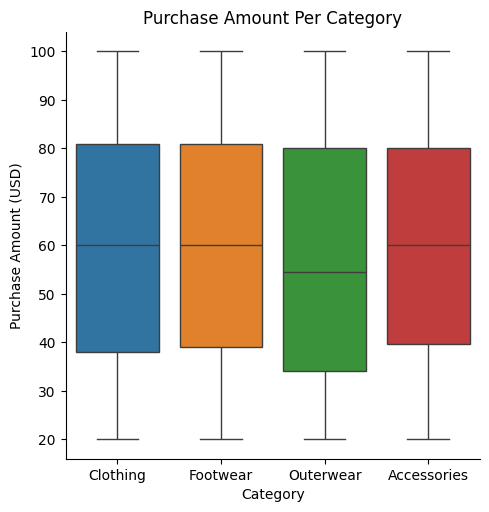

In [29]:
sns.catplot(kind="box" , x="Category" , y="Purchase Amount (USD)", data=Data , hue="Category")

plt.title("Purchase Amount Per Category")
plt.show()

# Count Plot

In [32]:
Data.groupby("Gender")["Purchase Amount (USD)"].sum()

Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64

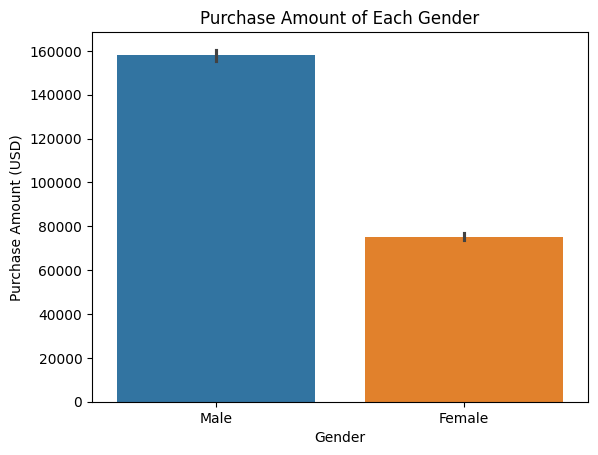

In [31]:
sns.barplot(data=Data , x="Gender" , y="Purchase Amount (USD)", hue="Gender" ,estimator="sum")

plt.title("Purchase Amount of Each Gender")
plt.show()

d:\PYTHON\Machine Learning\myenv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\PYTHON\Machine Learning\myenv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\PYTHON\Machine Learning\myenv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\PYTHON\Machine Learning\myenv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` 

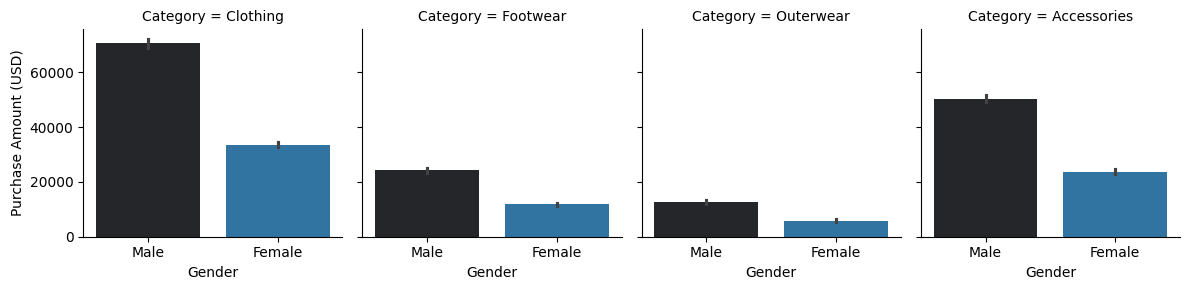

In [41]:
Col = sns.FacetGrid(Data , col="Category")

Col.map_dataframe(sns.barplot, data=Data , x="Gender" , y="Purchase Amount (USD)", hue="Gender" ,estimator="sum")



# Age and Purchase Amount

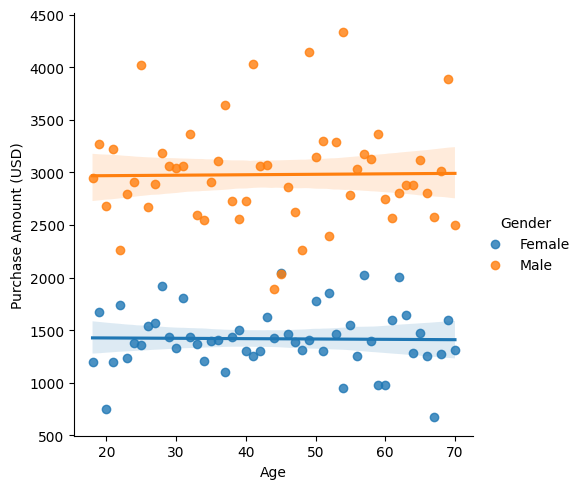

In [52]:
Age_Amount = Data.groupby(["Age" , "Gender"])["Purchase Amount (USD)"].sum().reset_index()

sns.lmplot(data=Age_Amount , x="Age" , y="Purchase Amount (USD)" , hue="Gender")

# Review Rating By Season

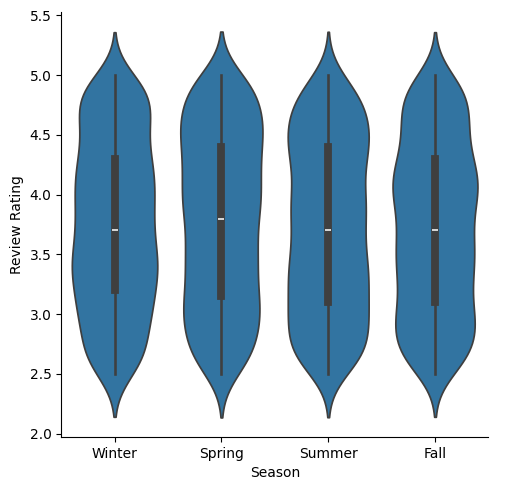

In [55]:
sns.catplot(kind="violin" , data=Data , x="Season" ,y="Review Rating")

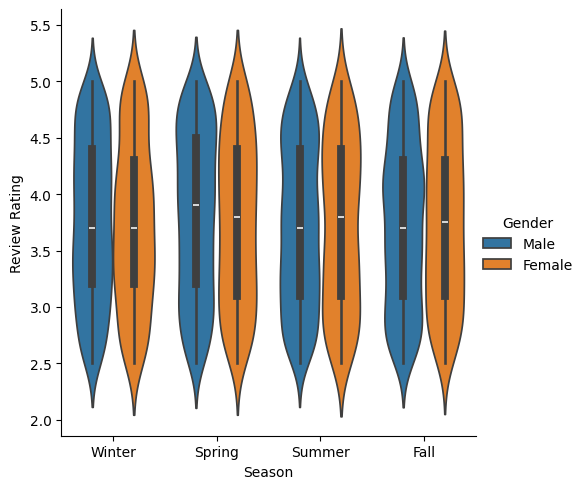

In [56]:
sns.catplot(kind="violin" , data=Data , x="Season" ,y="Review Rating" , hue="Gender")

# Purchase Trend By Gender

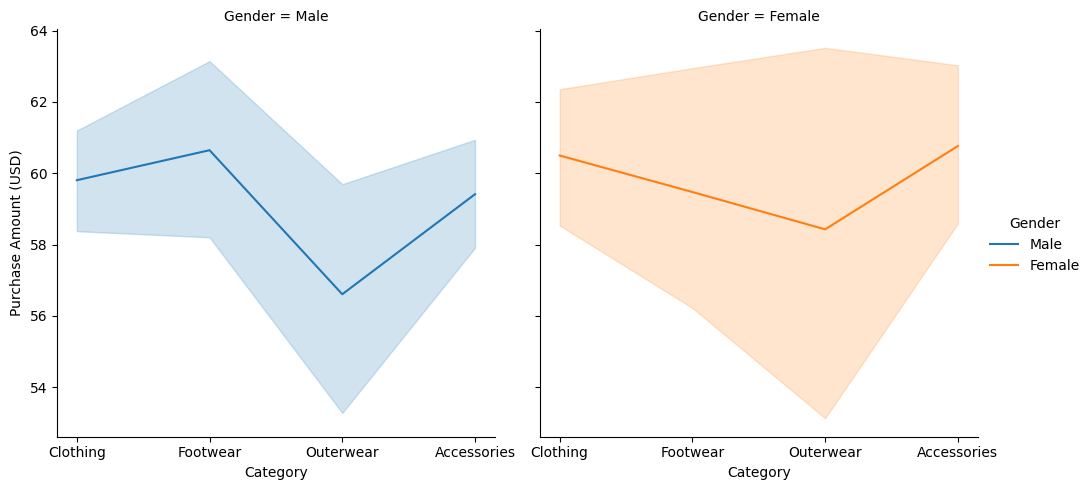

In [61]:
sns.relplot(kind="line" , data=Data , x="Category" , y="Purchase Amount (USD)", col="Gender" , hue="Gender")

C:\Users\eurika\AppData\Local\Temp\ipykernel_29000\3611042334.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\eurika\AppData\Local\Temp\ipykernel_29000\3611042334.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


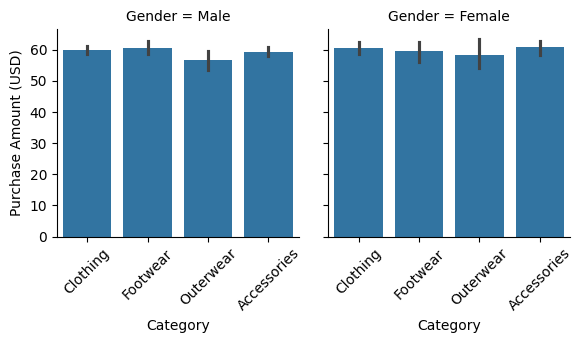

In [66]:
Category = sns.FacetGrid(Data , col="Gender")

Category.map_dataframe(sns.barplot , data=Data , x="Category" , y="Purchase Amount (USD)")

for ax in Category.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
plt.show()

# Preffered Payment Method

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Credit Card'),
  Text(1, 0, 'Bank Transfer'),
  Text(2, 0, 'Cash'),
  Text(3, 0, 'PayPal'),
  Text(4, 0, 'Venmo'),
  Text(5, 0, 'Debit Card')])

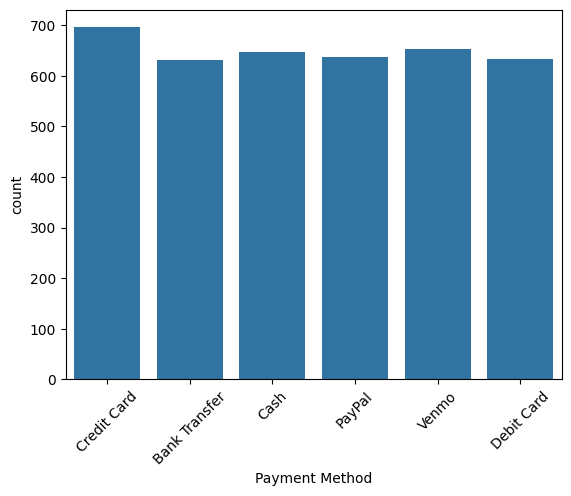

In [68]:
sns.countplot(data=Data , x="Payment Method")

plt.xticks(rotation = 45)

([<matplotlib.patches.Wedge at 0x20567150550>,
 [Text(0.9315986102908774, 0.5849136938934718, 'Credit Card'),
  Text(-0.084096560706151, 1.096780638267013, 'Venmo'),
  Text(-0.9922708735735216, 0.4747615332539491, 'Cash'),
  Text(-0.914246992245769, -0.6116800120729506, 'PayPal'),
  Text(0.04694924798434073, -1.0989976197033846, 'Debit Card'),
  Text(0.9605024913152167, -0.5361296150906627, 'Bank Transfer')],
 [Text(0.5081446965222967, 0.31904383303280276, '18%'),
  Text(-0.04587085129426417, 0.5982439845092798, '17%'),
  Text(-0.5412386583128299, 0.25896083632033584, '17%'),
  Text(-0.4986801775886012, -0.3336436429488821, '16%'),
  Text(0.025608680718731305, -0.599453247110937, '16%'),
  Text(0.5239104498082999, -0.29243433550399783, '16%')])

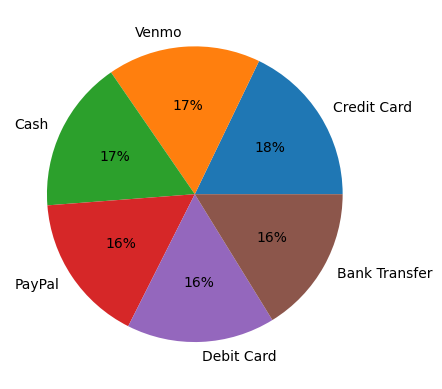

In [72]:
Payment_Method = Data["Payment Method"].value_counts()


plt.pie(Payment_Method, labels=Payment_Method.index , autopct='%.0f%%') 

# Heat Map

In [8]:
numerical_data = Data.select_dtypes(include=['number'])
numerical_data.head()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
0,1,55,53,3.1,14
1,2,19,64,3.1,2
2,3,50,73,3.1,23
3,4,21,90,3.5,49
4,5,45,49,2.7,31


In [13]:
Nuemerical = numerical_data[["Age" , "Purchase Amount (USD)" , "Review Rating"]]
Nuemerical.head()

,Age,Purchase Amount (USD),Review Rating
0,55,53,3.1
1,19,64,3.1
2,50,73,3.1
3,21,90,3.5
4,45,49,2.7


<Axes: >

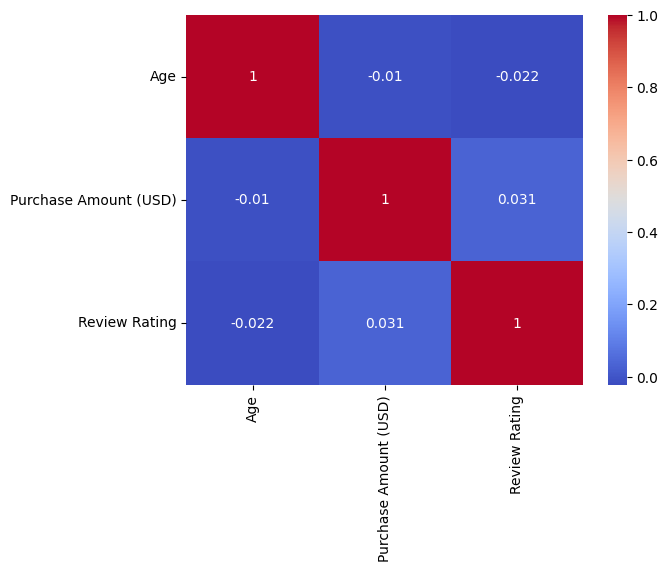

In [16]:
Correlation = Nuemerical.corr()

sns.heatmap(Correlation , annot=True , cmap="coolwarm")

# Location Wise Purchase Amount 

C:\Users\eurika\AppData\Local\Temp\ipykernel_27736\2985555410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Data, y="Location", x="Purchase Amount (USD)", palette="viridis")


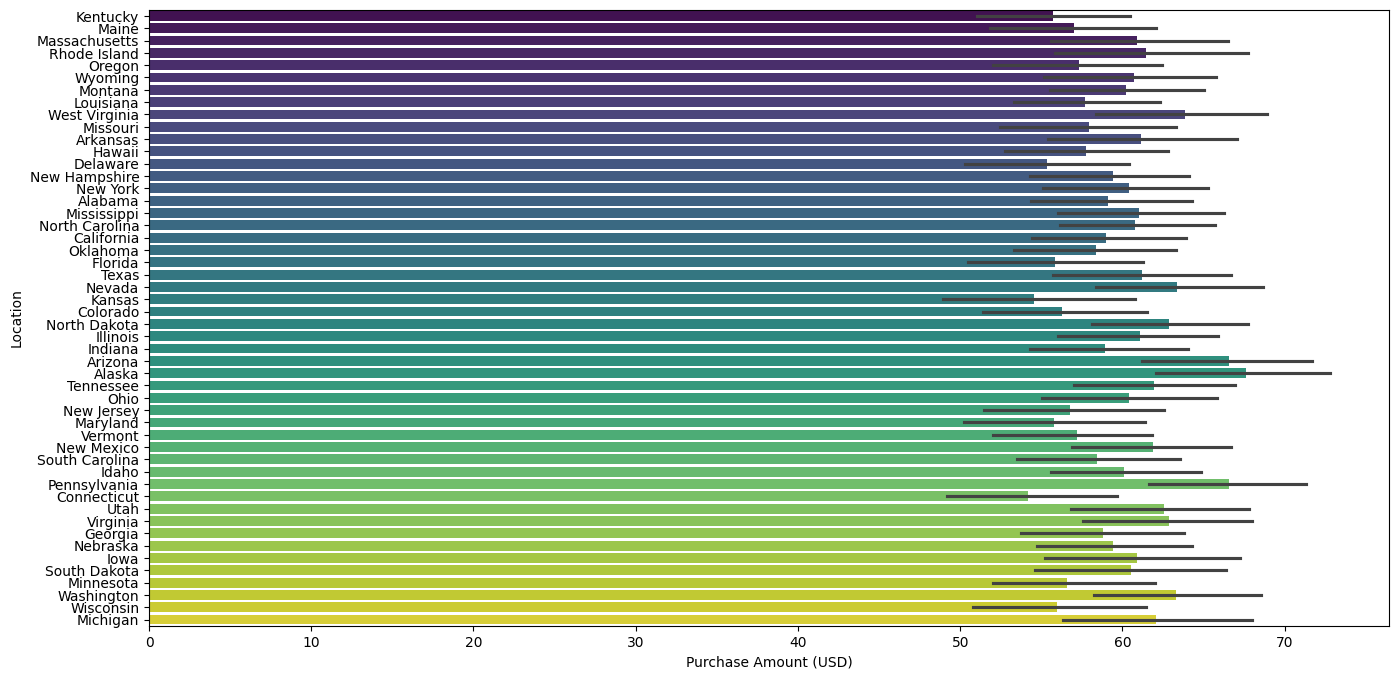

In [28]:
plt.figure(figsize=(16, 8))  # Adjust figure size
sns.barplot(data=Data, y="Location", x="Purchase Amount (USD)", palette="viridis")


plt.xticks(rotation=0) 



plt.show()


# Effect Of Discount

In [4]:
Data.head(10)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
5,6,46,Male,Sneakers,Footwear,20,Wyoming,M,White,Summer,2.9,Yes,Venmo,Standard,Yes,Yes,14,Venmo,Weekly
6,7,63,Male,Shirt,Clothing,85,Montana,M,Gray,Fall,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,49,Cash,Quarterly
7,8,27,Male,Shorts,Clothing,34,Louisiana,L,Charcoal,Winter,3.2,Yes,Debit Card,Free Shipping,Yes,Yes,19,Credit Card,Weekly
8,9,26,Male,Coat,Outerwear,97,West Virginia,L,Silver,Summer,2.6,Yes,Venmo,Express,Yes,Yes,8,Venmo,Annually
9,10,57,Male,Handbag,Accessories,31,Missouri,M,Pink,Spring,4.8,Yes,PayPal,2-Day Shipping,Yes,Yes,4,Cash,Quarterly


<Axes: xlabel='Discount Applied', ylabel='Review Rating'>

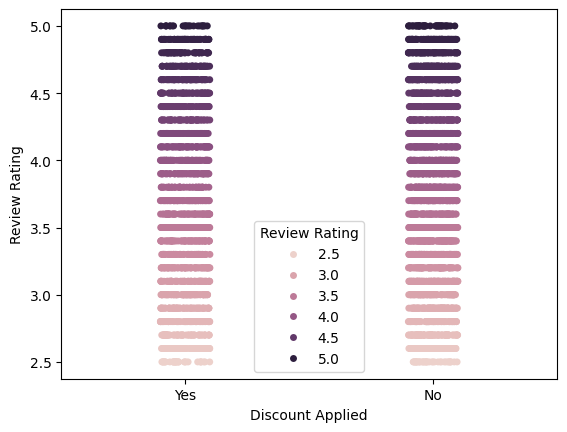

In [9]:
sns.stripplot(data=Data , x="Discount Applied" , y="Review Rating" , jitter=True , hue="Review Rating")